<h1>Springboard Projects, Capstone #1:</h1> 
<h2>Naives Bayes for NLP with Amazon Alexa reviews</h2>

Paying attention to what customers want, think, or feel about a product is a critical piece of any successful business. We also know that people love to talk about the things they buy. Whether it's the great new snackfood from the grocery store or the latest technology, if people like a product and leave a positive review, this can quickly lead to more sales. Product review data can offer valuable insight into how consumers are interacting with a product. Further, by automating this analysis and accounting for things such as unigram and bigram frequency, companies can more quickly understand how a product is being received and, as a result, can tailor production to yield better outcomes.

The dataset used here is publicly available at Kaggle (https://www.kaggle.com/sid321axn/amazon-alexa-reviews).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Read in the data: Alexa_data
Alexa_data = pd.read_csv('amazon_alexa.tsv',delimiter='\t')
print(list(Alexa_data.columns.values)) # create a file header
print(Alexa_data.head(15)) # print the last N rows

['rating', 'date', 'variation', 'verified_reviews', 'feedback']
    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
1        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
4        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    
11       5  30-Jul-18      Charcoal Fabric    
12       5  30-Jul-18           Oak Finish    
13       5  30-Jul-18      Charcoal Fabric    
14       5  30-Jul-18           Oak Finish    

                                     verified_reviews  feedback  
0                                       Love my Echo!         1  
1                                           Loved i

In [3]:
# Drop rows with no review
Alexa_data = Alexa_data[~Alexa_data.verified_reviews.isnull()]
Alexa_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
Alexa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 147.7+ KB


<b>#1: Let's count some things and get to know the data.</b>

In [5]:
Alexa_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
Alexa_dates = pd.to_datetime(Alexa_data.date) 
earliest = min(Alexa_dates)
latest = max(Alexa_dates)
print("Earliest review in the dataset: ", earliest)
print("Latest review in the dataset: ", latest)

n_varieties = Alexa_data.variation.unique().size
print("Number of Alexa variations: {:d}".format(n_varieties))

Earliest review in the dataset:  2018-05-16 00:00:00
Latest review in the dataset:  2018-07-31 00:00:00
Number of Alexa variations: 16


There are 3150 observations, or relevantly, 3150 verified reviews. Further, the reviews come from between May 16, 2018 and July, 31, 2018. Of the variations of Alexa, there are 16 represented in the dataset, but this seems mostly related to the appearance of the device. The 'variation' column may not be very helpful to us here.

<b>#2. Can you find trends (i.e. high, low, increasing, decreasing)</b>

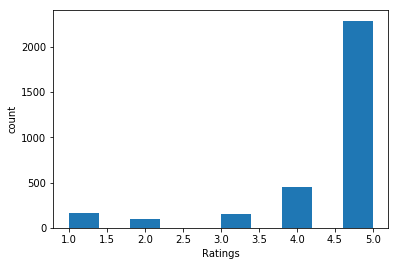

In [7]:
# Plot the ratings
_ = plt.hist(x=Alexa_data.rating)

# Label axes
_ = plt.xlabel('Ratings')
_ = plt.ylabel('count')

# Show histogram
plt.show()


In [8]:
# Group the reviews by rating: by_rating
by_rating = Alexa_data.groupby('rating')

# Aggregate 'rating' column of by_rating by count
count_by_rating = by_rating['rating'].count()
print(count_by_rating)

rating
1     161
2      96
3     152
4     455
5    2286
Name: rating, dtype: int64


By plotting the data and grouping the data by rating, we see that the data is highly skewed to the left. This is corroborated by the counts, which tell us that the majority of the reviews, 2286 of 3150, are positive.

<b>However,</b> we should note that, with this data, we don't know whether the product is really that satisfactory or whether the group of participants electing to leave a review are more inclined to leave a review when it's positive. <b>But,</b> we can ask, of the people who post positive versus negative reviews, what are the pivotal issues, product-wise? We'll continue to explore this below.

In any case, there is still a high enough number of negative reviews that we can still look into opposing sentiments and explore why the product was reviewed the way that it was.

<b>As part of exploratory data analysis, we should continue to visualize the data, namely from a textual perspective</b>. Specifically, we can create a wordcloud to show the kinds of words being utilized and at what frequency. For example, we can do this with a single review or with the dataset, as a whole.

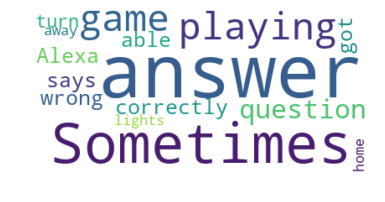

In [9]:
single_text = Alexa_data.verified_reviews[2]

wordcloud = WordCloud(background_color="white").generate(single_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
print(Alexa_data.verified_reviews[2])
print(Alexa_data.rating[2])

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
4


Based on this individual cloud of a single review, we get a sense that this individual uses Alexa for maybe playing games or answering questions. The size of the words gives us a good idea about word frequency within the review.

Checking the wordcloud with the actual review and the rating the person gave, the person expressed positive sentiment but not as high as s/he could have based on the issue with Alexa incorrectly identifying answers as right or wrong. We could also see that since the person didn't use any words of highly emotive sentiment (i.e. love, appreciate), this is correctly reflected in the rating of 4 instead of 5. So far, seems like the wordcloud can help us explore the data conceptually.

We can extend this approach and look at the entire dataset by first joining all of the text in the dataframe together for a wordcloud for all of the text data.

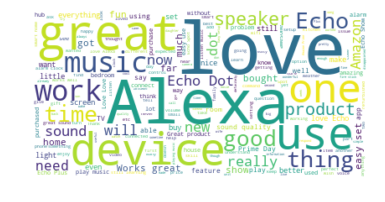

In [11]:
# Join the text together
all_text = " ".join(review for review in Alexa_data.verified_reviews)

# Generate wordcloud
wordcloud = WordCloud(background_color="white").generate(all_text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Yep, it looks like strongly emotive words like 'love' are highly frequent, and this is reasonable to believe, as the majority of the data contains '5' ratings. 

<b>However,</b> although this basic cloud is a good depiction of the words used and how often, <b>some of these words at not very helpful</b>. For example, we know that the reviews are about Amazon Alexa, so the frequency of words like 'Alexa' and 'Amazon' are unsurprising. The problem with leaving in these highly frequent, expected words is that they obscure words that are potentially more insightful yet less frequent. Creating a list of stopwords will help us identify which words we want to ignore and to clarify the result to gain more insight.

In [12]:
# Create list of stopwords:
stopwords = set(STOPWORDS)
stopwords.update(["Alexa", "Amazon", "Echo", "Echo Dotsound", "device", "dot"], "product")

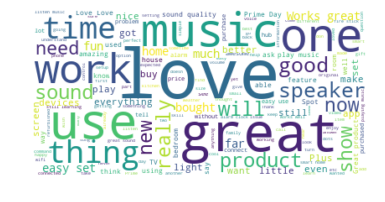

In [13]:
# Generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

After implementing the list of stopwords in the visualization, the updated wordcloud seems more informative. For example, we see that reviewers often talk about the music applications, for example, the sound and the speakers. Further, from the frequent appearance of words like "time" and "work", we could hypothesize that people associate the product with efficiency and productivity. 

While wordclouds are insightful for exploring the data initially, <b>this is not the whole story</b>. For example, the wordcloud doesn't account for bigram information (i.e. how often does "sound" come after "great" versus "terrible"), and  because of this, we can't reliably make claims about sentiment at this point.

However, one thing we can do is explore the data that's generally negative (i.e. reviews of '2' or '1') and the data that's positive (i.e. reviews of '4' or '5') separately. We can visualize this as well.

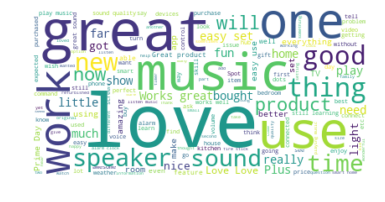

In [14]:
high_ratings = Alexa_data[Alexa_data.rating > 3]

# Join the text from low_ratings together
high_rating_text = " ".join(review for review in high_ratings.verified_reviews)

# Generate wordcloud for low ratings only
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(high_rating_text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

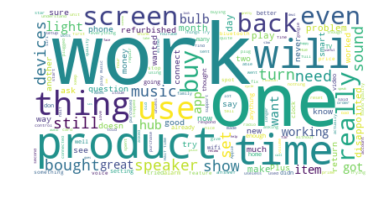

In [15]:
low_ratings = Alexa_data[Alexa_data.rating < 3]

# Join the text from low_ratings together
low_rating_text = " ".join(review for review in low_ratings.verified_reviews)

# Generate wordcloud for low ratings only
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(low_rating_text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interestingly, while music and efficiency features seem to be mentioned a lot in positive reviews, considerations of time and functionality are included often in the negative reviews. The negative reviews, too, include ideas such as purchasing and buying (i.e. "buy", "bought"), which might arise from dissatisfaction with a purchase, generally, when functionality isn't up to par. When it is, the customer is happy to report on the product alone. 

<h3> Naive Bayes approach to text analysis</h3>

For the classification task, we will first split the data into test and training data, and then use scikit-learn's MultiNomialNB() to implement a simple Naive Bayes classifier. 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [17]:
def make_xy(Alexa_data, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(Alexa_data.verified_reviews)
    X = X.tocsc()  
    y = (Alexa_data.rating).values.astype(np.int)
    return X, y
X, y = make_xy(Alexa_data)

In [18]:
# Split the data into training, test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Build the classifier with default parameters
NB_class = MultinomialNB()

# Fit the classifier to the training data
NB_class.fit(X_train, y_train)

# Print the accuracy scores for both training, test sets
print(NB_class.score(X_train, y_train))
print(NB_class.score(X_test, y_test))

0.8421768707482993
0.7576719576719577


With this data, the classifier did moderately well with the training data at ~84.22% accuracy; it didn't do quite so well with the test data.

Moving forward, we could modify the model by tuning the hyperparameters, determining whether we are using the best settings for the model. One of the parameters we could modify is min_df, or the threshold at which we exclude words from the analysis. For example, if words are used only once or twice in the dataset, we could exclude them. However, because the reviews are so short (i.e. less than a paragraph in most instances), we'll leave this set to 0, the default value.

Next, we will experiment with different values of alpha to determine the best Naive Bayes classifier. The default alpha setting is 1.

In [19]:
# Build the classifier with alpha=0.1 parameters
NB_class = MultinomialNB(alpha=0.1)

# Fit the classifier to the training data
NB_class.fit(X_train, y_train)

# Print the accuracy scores for both training, test sets
print(NB_class.score(X_train, y_train))
print(NB_class.score(X_test, y_test))

0.9120181405895692
0.7841269841269841


In [20]:
# Build the classifier with alpha=0.01
NB_class = MultinomialNB(alpha=0.01)

# Fit the classifier to the training data
NB_class.fit(X_train, y_train)

# Print the accuracy scores for both training, test sets
print("MultinomialNB Accuracy, training data:",NB_class.score(X_train, y_train))
print("MultinomialNB Accuracy, testing data:",NB_class.score(X_test, y_test))

MultinomialNB Accuracy, training data: 0.9160997732426304
MultinomialNB Accuracy, testing data: 0.7682539682539683


Comparing these two modified models, an alpha value of 0.1 leads to better accuracy with both the training data and the test data than running the model with alpha set to 1. Alpha set to 0.01 improves the training model fit minimally but doesn't perform as well with the test data.

<h3> TF-IDF approach to text analysis</h3>

There are always many options when approaching a new dataset and research problem. Particularly relevant for text data is TF-IDF, or term frequency-inverse document frequency. TF-IDF is a metric that can be used to assess the importance of a term in a document. 

First, the term frequency, or tf, provides a frequency count of each word in a given document or collection of documents. It is the frequency of that word's occurrence relative to the document's total word count, scaled logarithmically. The inverse document frequency measures how rare a word is within a document or collection of documents. TF-IDF, then, is the product of these two measures.

We can use TF-IDF as a metric to filter out: 1) words or terms that appear very frequently but aren't very informative about the content of the reviews (i.e. proper names such as "Amazon" or "Alexa"); and/or 2) words or terms that appear so infrequently (i.e. less than 5 times in the dataset) that their inclusion in a text analysis isn't very helpful.

First, we'll instantiate a TF-IDF vectorizer object to transform the review data into an array containing word frequencies.

In [21]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a vectorizer object: tfidf
tfidf = TfidfVectorizer(stop_words='english') # specifying stopwords filters out other frequent, yet uninformative tokens

# Apply fit_transform to reviews: review_docs_array
review_docs_tf = tfidf.fit_transform(Alexa_data.verified_reviews) # transforms reviews to a word-frequency array

# Print result of toarray() method
print(review_docs_tf.toarray())

# Get the words that appear in the reviews: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts

In [22]:
# Split the data using train_test_split, this time incorporating TF-IDF approach
X_train, X_test, y_train, y_test = train_test_split(
    review_docs_tf, Alexa_data.rating, test_size=0.3, random_state=42)

from sklearn import metrics

# We'll generate the model again using Multinomial Naive Bayes, this time incorporating the TF-IDF approach
classifier = MultinomialNB().fit(X_train, y_train)
predicted= classifier.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7142857142857143


The model accuracy is ~71%, slightly lower than the accuracy of the model we ran before, with a test accuracy of ~78%. 

In [23]:
# Let's try again, this time changing alpha to improve model accuracy
classifier = MultinomialNB(alpha=0.05).fit(X_train, y_train)
predicted= classifier.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7798941798941799


By changing alpha (default=1.0), the model's accuracy has improved.